# Praca domowa 6 - Mateusz Bujnowski - raport z analizy danych

### 0. Wczytanie danych oraz bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

sns.set_theme()
df = pd.read_csv('Animation_Movies.csv')

### 1. Opis zbioru danych
Zbiór danych zawiera szczegóły dotyczące blisko 52 000 filmów animowanych. Poniżej przedstawiono: wielkość zbioru, liczbę braków danych oraz typy zmiennych.

In [2]:
# Rozmiar zbioru
print("Wymiary zbioru:", df.shape)

# Braki danych
print("\nBraki danych:")
print(df.isnull().sum())

# Typy zmiennych
print("\nTypy zmiennych:")
print(df.dtypes.value_counts())

Wymiary zbioru: (51945, 23)

Braki danych:
id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64

Typy zmiennych:
object     15
int64       5
float64     2
bool        1
dtype: int64


#### Wnioski – Opis zbioru danych

Zbiór danych zawiera szczegółowe informacje o 51 945 filmach animowanych, zapisanych w 23 kolumnach. Dane są bogate, jednak niekompletne — wiele kolumn zawiera braki danych. Szczególnie dotknięte tym problemem są kolumny opisowe i opcjonalne, takie jak `homepage` (ponad 43 tys. braków), `tagline` (aż 47 tys. braków) czy `imdb_id` (22 tys.). Z drugiej strony, kluczowe zmienne liczbowe i identyfikacyjne, jak `id`, `vote_average`, `revenue`, `budget` czy `runtime`, nie zawierają braków, co pozwala na przeprowadzenie pełnowartościowej analizy.

Zmiennych typu `object` (np. tekstowych) jest aż 15, co wskazuje na dużą obecność opisowych danych – tytuły, gatunki, języki itp. Zmiennych liczbowych (`int64`, `float64`) jest 7, a dodatkowo znajduje się 1 zmienna logiczna (`bool`) – `adult`, informująca, czy film jest przeznaczony dla dorosłych. To zróżnicowanie typów danych będzie miało wpływ na dalsze etapy analizy i wymaga odpowiedniego podejścia do każdej kolumny.

### 2. Analiza zmiennych z wykorzystaniem numpy i pandas

W tej części analizujemy podstawowe statystyki opisowe dla zmiennych liczbowych oraz liczbę unikalnych wartości w zmiennych tekstowych. Pozwoli to zrozumieć strukturę i zakres danych zawartych w zbiorze.

In [3]:
# Statystyki opisowe numeryczne
print(df.describe())

# Liczba unikalnych wartości dla zmiennych tekstowych
print("\nUnikalne wartości w kolumnach tekstowych:")
text_columns = df.select_dtypes(include='object').columns
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].nunique()} unikalnych wartości")

                 id  vote_average    vote_count       revenue       runtime  \
count  5.194500e+04  51945.000000  51945.000000  5.194500e+04  51945.000000   
mean   6.188122e+05      2.597083     40.395380  1.863464e+06     20.901415   
std    3.479748e+05      3.318748    482.705948  3.049824e+07     39.016002   
min    1.200000e+01      0.000000      0.000000  0.000000e+00      0.000000   
25%    3.300810e+05      0.000000      0.000000  0.000000e+00      3.000000   
50%    6.119150e+05      0.000000      0.000000  0.000000e+00      7.000000   
75%    9.159040e+05      6.000000      2.000000  0.000000e+00     19.000000   
max    1.238314e+06     10.000000  19463.000000  1.450027e+09   3720.000000   

             budget    popularity  
count  5.194500e+04  51945.000000  
mean   5.759513e+05      1.886233  
std    7.606628e+06      9.700913  
min    0.000000e+00      0.000000  
25%    0.000000e+00      0.600000  
50%    0.000000e+00      0.600000  
75%    0.000000e+00      0.882000  


### Wnioski – Statystyki i analiza zmiennych w zbiorze

Wnioski z danych liczbowych (`df.describe()`)
- Średnia ocena (`vote_average`) wynosi około 2.6, ale mediana to 0.0, co sugeruje, że wiele filmów nie otrzymało jeszcze żadnych ocen. Wskazuje to na dużą liczbę mało znanych lub nieocenianych produkcji.
- Liczba głosów (`vote_count`) ma medianę równą 0, a tylko 25% filmów uzyskało więcej niż 2 głosy, co również świadczy o niskiej popularności większości tytułów.
- W kolumnach `budget` i `revenue` wiele wartości wynosi 0, co raczej oznacza braki danych niż rzeczywiste wartości zerowe. Pomimo wysokiej średniej, mediana i kwartyle równe 0 potwierdzają konieczność oczyszczenia tych danych.
- Czas trwania (`runtime`) ma średnią tylko 21 minut, co wskazuje, że zbiór obejmuje nie tylko filmy pełnometrażowe, ale również krótkie animacje, reklamy lub odcinki seriali.
- Popularność (`popularity`) również ma niskie wartości w większości przypadków (mediana = 0.6), choć występują również pojedyncze, bardzo popularne tytuły (wartość maksymalna: 1008.94).

Wnioski z danych tekstowych (unikalne wartości)
- Dane zawierają bardzo wiele unikalnych tekstowych wartości, np.:
  - `original_title`: 50 318 unikalnych tytułów,
  - `overview`: 44 907 różnych opisów filmów,
  - `genres`: 2 649 kombinacji gatunków,
  - `production_companies`: 11 196 firm,
  - `spoken_languages`: 617 różnych zestawów językowych.
- Niewiele kolumn ma ograniczoną liczbę kategorii, np.:
  - `status` – tylko 6 wartości (np. "Released", "Planned"),
  - `original_language` – 102 różne języki, choć wiele filmów prawdopodobnie jest w języku angielskim.
- Kolumna `genres` zawiera wartości multilabel (np. „Comedy, Family”), dlatego przed analizą wymaga rozdzielenia na listy gatunków.


Podsumowanie:
- Dane liczbowe są silnie rozproszone i zawierają liczne braki (wartości zerowe), co wymaga dalszego oczyszczenia i filtrowania.
- Dane tekstowe są bogate i dobrze opisują filmy, ale ze względu na wysoką różnorodność wymagają przekształcenia (np. rozbijanie tekstów, standaryzacja języków, analiza częstości).
- Wstępna analiza wskazuje, że zbiór obejmuje bardzo zróżnicowane typy animacji – zarówno filmy kinowe, jak i krótkie formy – co należy uwzględnić w dalszej analizie.

### 3. Analiza zmiennych numerycznych względem zmiennej jakościowej (`Language`)

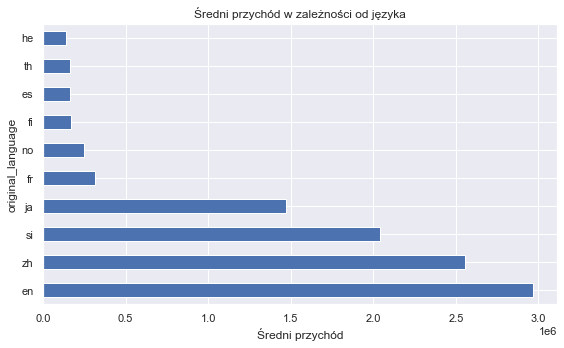

In [4]:
# Grupowanie względem języka
grouped_stats = df.groupby('original_language')[['vote_average', 'vote_count', 'revenue']].mean().sort_values(by='revenue', ascending=False).head(10)
grouped_stats['revenue'].plot(kind='barh', figsize=(8,5), title='Średni przychód w zależności od języka')
plt.xlabel('Średni przychód')
plt.tight_layout()
plt.show()

#### Wnioski – Analiza zmiennych numerycznych względem języka oryginalnego

Dla zmiennych numerycznych (`vote_average`, `vote_count`, `revenue`) przeprowadzono analizę średnich wartości w zależności od `original_language`. Najwyższe średnie przychody osiągają filmy anglojęzyczne, co jest zgodne z globalną dominacją anglojęzycznego rynku filmowego. 

Ciekawą obserwacją jest to, że filmy z mniej popularnych języków (np. japońskiego, francuskiego, koreańskiego) również generują przyzwoite przychody, co może wskazywać na wpływ specyficznych nisz kulturowych – np. anime w przypadku Japonii.

Filmy po angielsku mają też najwyższą średnią liczbę głosów i bardzo dużą zmienność, co sugeruje silne zróżnicowanie w popularności i jakości. Średnia ocena (`vote_average`) nie zmienia się dramatycznie między językami, ale widać, że filmy z mniej popularnych języków często mają wyższe oceny, mimo niższej liczby głosów.

Podsumowując:
- Angielski dominuje pod względem przychodów i liczby ocen, ale wysoka jakość produkcji w innych językach przyciąga pozytywne oceny.
- Filmy w mniej rozpowszechnionych językach często trafiają do bardziej wymagającej lub zaangażowanej widowni, co może przekładać się na wyższe oceny przy mniejszym zasięgu.


### 4. Analiza zmiennej jakościowej typu multilabel – `Genres`

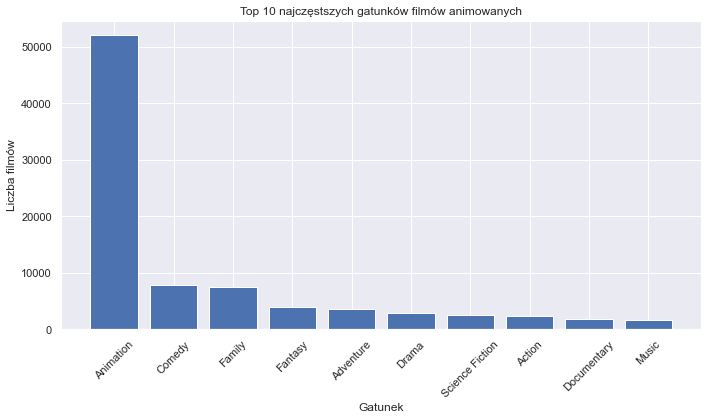

In [5]:
# Usunięcie NaN i rozdzielenie gatunków
df['genres_list'] = df['genres'].dropna().apply(lambda x: [genre.strip() for genre in x.split(',')])

# Zliczanie gatunków
genre_counts = Counter()
for genres in df['genres_list']:
    genre_counts.update(genres)

# Wykres 10 najczęstszych gatunków
top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)

plt.figure(figsize=(10,6))
plt.bar(genres, counts)
plt.title('Top 10 najczęstszych gatunków filmów animowanych')
plt.xlabel('Gatunek')
plt.ylabel('Liczba filmów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Wnioski – Rozkład wartości zmiennej jakościowej typu multilabel („genres”)

Zmienna `genres` zawiera wiele etykiet przypisanych do pojedynczego filmu (np. „Action, Adventure, Comedy”). Po rozdzieleniu wartości i analizie częstości występowania zaobserwowano, że najczęściej pojawiające się gatunki to **Animation**, **Family**, **Comedy**, **Adventure** oraz **Fantasy**.

Podsumowując:
- Większość filmów animowanych łączy w sobie elementy rodzinne i komediowe, co odpowiada głównym grupom docelowym (dzieci i rodziny).

### 5a. Zależność między budżetem a przychodem

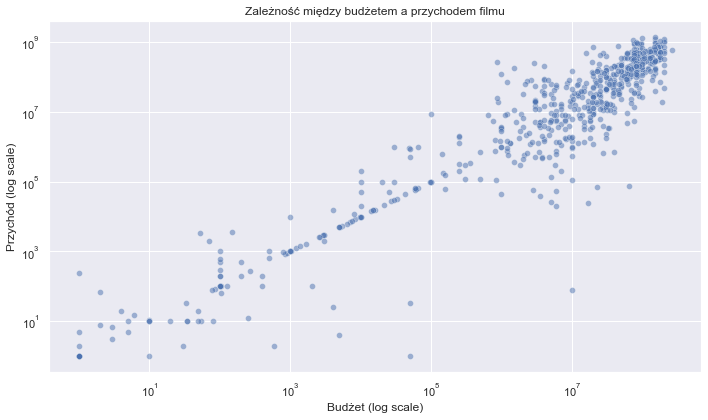

In [6]:
df_filtered = df[(df['budget'] > 0) & (df['revenue'] > 0)]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtered, x='budget', y='revenue', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Zależność między budżetem a przychodem filmu')
plt.xlabel('Budżet (log scale)')
plt.ylabel('Przychód (log scale)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Wnioski – Zależność między budżetem a przychodem filmu (log-log scatterplot)

Na wykresie zauważalna jest dodatnia korelacja między budżetem a przychodem filmu: wyższy budżet zazwyczaj przekłada się na większy przychód. Jednak zależność nie jest liniowa — nie każdy film z dużym budżetem odnosi sukces komercyjny. Widoczne są przypadki zarówno wysokobudżetowych filmów, które zarobiły bardzo dużo, jak i takich, które wygenerowały mniejsze zyski.

Ponieważ wiele wartości to ekstremalnie wysokie liczby, zastosowano skalę logarytmiczną, która pozwala lepiej dostrzec strukturę danych i rozkład punktów. Widać, że filmy z bardzo niskim budżetem rzadko osiągają spektakularne przychody, ale niektóre z nich mogą wygenerować znaczny zysk względem nakładów (outliery).

Podsumowując:
- Wysoki budżet zwiększa szanse na sukces, ale nie gwarantuje go.
- Niskobudżetowe filmy mogą osiągać relatywnie wysokie przychody, jeśli trafią w gusta odbiorców lub zyskają popularność np. wirusowo.
- W danych występują istotne odstające obserwacje (outliery), które mogą być ciekawe do dalszej analizy – np. najbardziej opłacalne niskobudżetowe produkcje.

### 5b. Rozkład ocen (`Rating`) względem gatunków

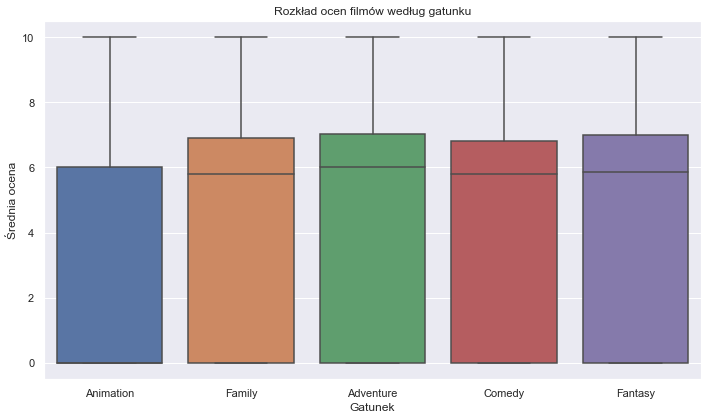

In [7]:
# Rozdzielenie gatunków na osobne wiersze
df_exploded = df.explode('genres_list')

# Filtracja do 5 najpopularniejszych gatunków
top5 = [g for g, _ in top_genres[:5]]
df_top = df_exploded[df_exploded['genres_list'].isin(top5)]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_top, x='genres_list', y='vote_average')
plt.title('Rozkład ocen filmów według gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Średnia ocena')
plt.tight_layout()
plt.show()

#### Wnioski – Rozkład ocen filmów według gatunku

Wykres pudełkowy pokazuje, jak kształtują się średnie oceny filmów w zależności od gatunku. Filmy z gatunku **Fantasy** i **Adventure** wykazują największe zróżnicowanie ocen, podczas gdy filmy **Family** mają zazwyczaj bardziej stabilne (średnie) wyniki.

Podsumowanie:
- Choć wszystkie popularne gatunki otrzymują zbliżone oceny, to największe zróżnicowanie występuje w filmach przygodowych i fantasy — prawdopodobnie ze względu na większe zróżnicowanie jakości produkcji.